<a href="https://colab.research.google.com/github/nileshrajbugaliya/machine_learning_project/blob/master/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train1.csv to train1.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [0]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from itertools import product, starmap

In [0]:
df  = pd.read_csv(r"train1.csv")
df.head(1)

,date,store,item,sales
0,2013-01-01,1,1,13


In [0]:
df.index = df['date']
train = df.drop(['date'], axis=1)

In [0]:
train.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [0]:
def storeitems():
    return product(range(1,11), range(1,51))


def storeitems_column_names():
    return list(starmap(lambda i,s: f'store_{i}_item_{s}_sales', storeitems()))


def sales_by_storeitem(df):
    ret = pd.DataFrame(index=df.index.unique())
    for i, s in storeitems():
        ret[f'store_{i}_item_{s}_sales'] = df[(df['store'] == i) & (df['item'] == s)]['sales'].values
    return ret

In [0]:
df_train = sales_by_storeitem(train)

In [0]:
df_train.keys()

Index(['store_1_item_1_sales', 'store_1_item_2_sales', 'store_1_item_3_sales',
       'store_1_item_4_sales', 'store_1_item_5_sales', 'store_1_item_6_sales',
       'store_1_item_7_sales', 'store_1_item_8_sales', 'store_1_item_9_sales',
       'store_1_item_10_sales',
       ...
       'store_10_item_41_sales', 'store_10_item_42_sales',
       'store_10_item_43_sales', 'store_10_item_44_sales',
       'store_10_item_45_sales', 'store_10_item_46_sales',
       'store_10_item_47_sales', 'store_10_item_48_sales',
       'store_10_item_49_sales', 'store_10_item_50_sales'],
      dtype='object', length=500)

In [0]:
store_item = []
store_item = df_train.keys()

In [0]:
store_item

Index(['store_1_item_1_sales', 'store_1_item_2_sales', 'store_1_item_3_sales',
       'store_1_item_4_sales', 'store_1_item_5_sales', 'store_1_item_6_sales',
       'store_1_item_7_sales', 'store_1_item_8_sales', 'store_1_item_9_sales',
       'store_1_item_10_sales',
       ...
       'store_10_item_41_sales', 'store_10_item_42_sales',
       'store_10_item_43_sales', 'store_10_item_44_sales',
       'store_10_item_45_sales', 'store_10_item_46_sales',
       'store_10_item_47_sales', 'store_10_item_48_sales',
       'store_10_item_49_sales', 'store_10_item_50_sales'],
      dtype='object', length=500)

In [0]:
df_train.head()

,store_1_item_1_sales,store_1_item_2_sales,store_1_item_3_sales,store_1_item_4_sales,store_1_item_5_sales,store_1_item_6_sales,store_1_item_7_sales,store_1_item_8_sales,store_1_item_9_sales,store_1_item_10_sales,store_1_item_11_sales,store_1_item_12_sales,store_1_item_13_sales,store_1_item_14_sales,store_1_item_15_sales,store_1_item_16_sales,store_1_item_17_sales,store_1_item_18_sales,store_1_item_19_sales,store_1_item_20_sales,store_1_item_21_sales,store_1_item_22_sales,store_1_item_23_sales,store_1_item_24_sales,store_1_item_25_sales,store_1_item_26_sales,store_1_item_27_sales,store_1_item_28_sales,store_1_item_29_sales,store_1_item_30_sales,store_1_item_31_sales,store_1_item_32_sales,store_1_item_33_sales,store_1_item_34_sales,store_1_item_35_sales,store_1_item_36_sales,store_1_item_37_sales,store_1_item_38_sales,store_1_item_39_sales,store_1_item_40_sales,...,store_10_item_11_sales,store_10_item_12_sales,store_10_item_13_sales,store_10_item_14_sales,store_10_item_15_sales,store_10_item_16_sales,store_10_item_17_sales,store_10_item_18_sales,store_10_item_19_sales,store_10_item_20_sales,store_10_item_21_sales,store_10_item_22_sales,store_10_item_23_sales,store_10_item_24_sales,store_10_item_25_sales,store_10_item_26_sales,store_10_item_27_sales,store_10_item_28_sales,store_10_item_29_sales,store_10_item_30_sales,store_10_item_31_sales,store_10_item_32_sales,store_10_item_33_sales,store_10_item_34_sales,store_10_item_35_sales,store_10_item_36_sales,store_10_item_37_sales,store_10_item_38_sales,store_10_item_39_sales,store_10_item_40_sales,store_10_item_41_sales,store_10_item_42_sales,store_10_item_43_sales,store_10_item_44_sales,store_10_item_45_sales,store_10_item_46_sales,store_10_item_47_sales,store_10_item_48_sales,store_10_item_49_sales,store_10_item_50_sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,13,33,15,10,11,31,25,33,18,37,37,33,37,22,42,14,13,38,15,22,22,59,14,41,59,16,14,49,34,17,30,22,37,23,28,49,16,21,25,19,...,49,41,46,30,51,20,20,45,21,31,33,34,22,35,48,22,9,54,35,21,42,30,47,15,45,55,19,47,30,17,12,20,24,17,45,37,11,25,17,33
2013-01-02,11,43,30,11,6,36,23,37,23,34,43,35,31,35,33,11,18,51,18,16,28,29,17,25,26,26,10,39,30,25,19,22,30,6,26,48,13,28,23,15,...,47,36,57,48,59,18,17,48,26,34,28,54,15,38,44,23,19,58,32,24,32,18,45,13,38,34,9,54,27,19,10,22,29,10,45,33,13,24,13,37
2013-01-03,14,23,14,8,8,18,34,38,25,32,34,41,50,26,45,12,15,42,20,24,23,33,5,32,42,31,12,57,35,25,33,30,40,15,38,45,12,40,29,12,...,60,39,36,45,49,10,25,50,25,35,18,56,12,38,60,30,14,59,36,29,33,26,39,19,31,54,23,55,21,18,17,27,43,20,56,28,16,29,19,46
2013-01-04,13,18,10,19,9,19,36,54,22,45,52,45,45,32,39,15,19,50,16,24,15,45,16,36,35,25,18,46,46,27,24,24,48,13,38,41,23,45,31,13,...,47,52,54,30,55,14,16,54,30,34,30,46,19,28,56,41,14,63,45,39,29,31,48,16,48,46,23,56,30,21,13,24,27,12,50,44,11,39,23,51
2013-01-05,10,34,23,12,8,31,38,51,29,35,45,46,49,31,47,22,16,56,19,36,18,32,23,31,45,27,13,45,43,22,32,28,31,15,45,48,23,38,29,19,...,31,49,55,45,72,14,16,67,30,33,31,63,25,45,50,26,14,67,49,30,35,24,38,15,59,60,19,51,46,23,14,25,31,25,62,45,16,34,22,41


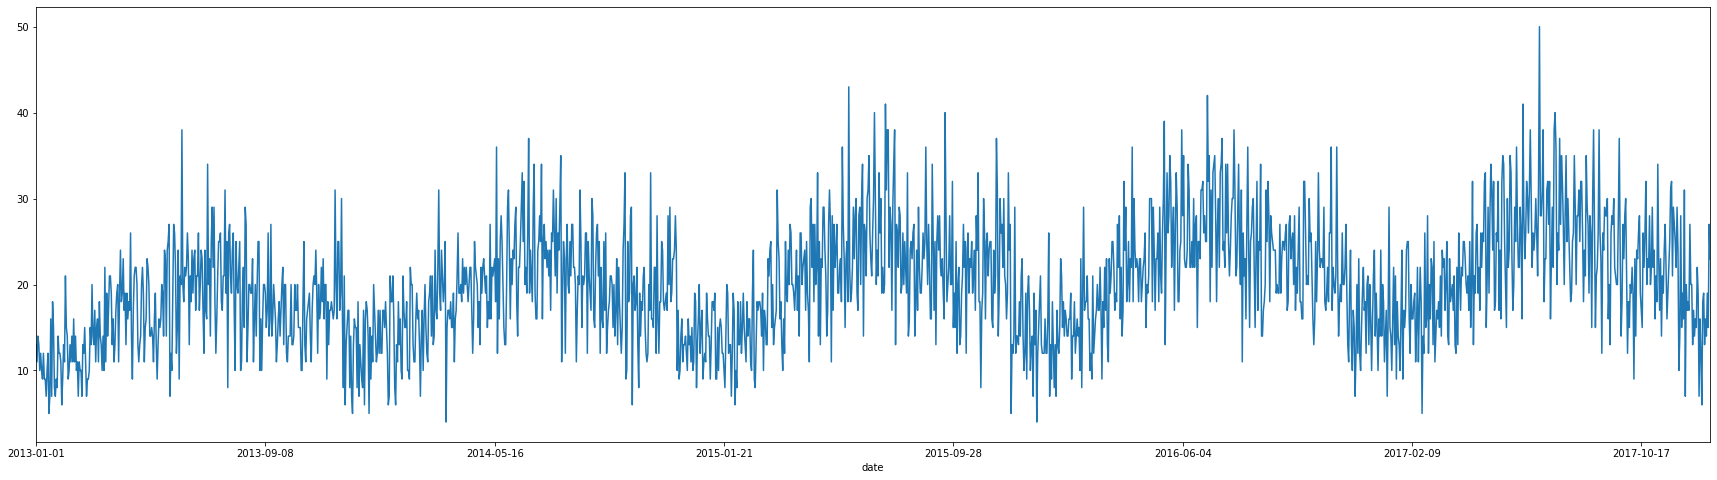

In [0]:
df_train['store_1_item_1_sales'].plot(figsize=(30,8))


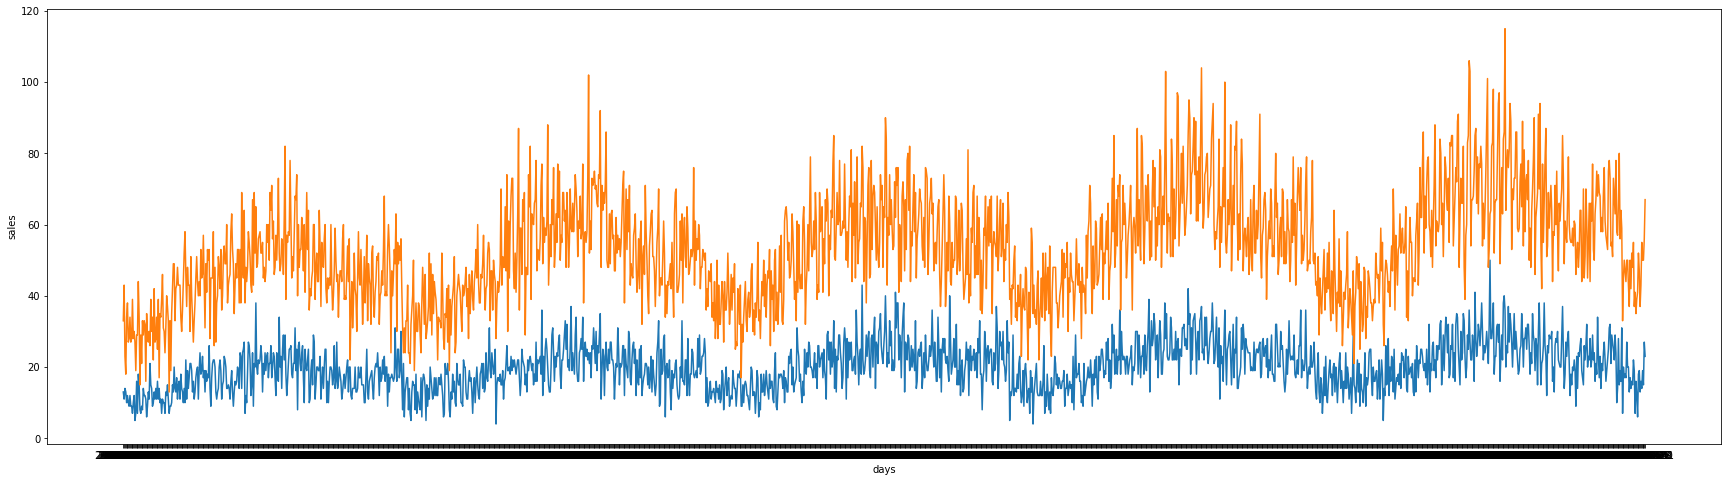

In [0]:
plt.figure(figsize=(30,8))
plt.plot(df_train.index, df_train['store_1_item_1_sales'])
plt.plot(df_train.index, df_train['store_1_item_2_sales'])
plt.xlabel("days")
plt.ylabel("sales")
plt.show()

In [0]:
mydata = df_train.rolling(10).mean()

In [0]:
roll_mean = df_train[:10].mean()
roll_std = df_train[:10].std()

In [0]:
type(roll_std)

pandas.core.series.Series

In [0]:
mydata.head()

,store_1_item_1_sales,store_1_item_2_sales,store_1_item_3_sales,store_1_item_4_sales,store_1_item_5_sales,store_1_item_6_sales,store_1_item_7_sales,store_1_item_8_sales,store_1_item_9_sales,store_1_item_10_sales,store_1_item_11_sales,store_1_item_12_sales,store_1_item_13_sales,store_1_item_14_sales,store_1_item_15_sales,store_1_item_16_sales,store_1_item_17_sales,store_1_item_18_sales,store_1_item_19_sales,store_1_item_20_sales,store_1_item_21_sales,store_1_item_22_sales,store_1_item_23_sales,store_1_item_24_sales,store_1_item_25_sales,store_1_item_26_sales,store_1_item_27_sales,store_1_item_28_sales,store_1_item_29_sales,store_1_item_30_sales,store_1_item_31_sales,store_1_item_32_sales,store_1_item_33_sales,store_1_item_34_sales,store_1_item_35_sales,store_1_item_36_sales,store_1_item_37_sales,store_1_item_38_sales,store_1_item_39_sales,store_1_item_40_sales,...,store_10_item_11_sales,store_10_item_12_sales,store_10_item_13_sales,store_10_item_14_sales,store_10_item_15_sales,store_10_item_16_sales,store_10_item_17_sales,store_10_item_18_sales,store_10_item_19_sales,store_10_item_20_sales,store_10_item_21_sales,store_10_item_22_sales,store_10_item_23_sales,store_10_item_24_sales,store_10_item_25_sales,store_10_item_26_sales,store_10_item_27_sales,store_10_item_28_sales,store_10_item_29_sales,store_10_item_30_sales,store_10_item_31_sales,store_10_item_32_sales,store_10_item_33_sales,store_10_item_34_sales,store_10_item_35_sales,store_10_item_36_sales,store_10_item_37_sales,store_10_item_38_sales,store_10_item_39_sales,store_10_item_40_sales,store_10_item_41_sales,store_10_item_42_sales,store_10_item_43_sales,store_10_item_44_sales,store_10_item_45_sales,store_10_item_46_sales,store_10_item_47_sales,store_10_item_48_sales,store_10_item_49_sales,store_10_item_50_sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
mydata  = mydata.dropna()

In [0]:
mydata.head(1)

,store_1_item_1_sales,store_1_item_2_sales,store_1_item_3_sales,store_1_item_4_sales,store_1_item_5_sales,store_1_item_6_sales,store_1_item_7_sales,store_1_item_8_sales,store_1_item_9_sales,store_1_item_10_sales,store_1_item_11_sales,store_1_item_12_sales,store_1_item_13_sales,store_1_item_14_sales,store_1_item_15_sales,store_1_item_16_sales,store_1_item_17_sales,store_1_item_18_sales,store_1_item_19_sales,store_1_item_20_sales,store_1_item_21_sales,store_1_item_22_sales,store_1_item_23_sales,store_1_item_24_sales,store_1_item_25_sales,store_1_item_26_sales,store_1_item_27_sales,store_1_item_28_sales,store_1_item_29_sales,store_1_item_30_sales,store_1_item_31_sales,store_1_item_32_sales,store_1_item_33_sales,store_1_item_34_sales,store_1_item_35_sales,store_1_item_36_sales,store_1_item_37_sales,store_1_item_38_sales,store_1_item_39_sales,store_1_item_40_sales,...,store_10_item_11_sales,store_10_item_12_sales,store_10_item_13_sales,store_10_item_14_sales,store_10_item_15_sales,store_10_item_16_sales,store_10_item_17_sales,store_10_item_18_sales,store_10_item_19_sales,store_10_item_20_sales,store_10_item_21_sales,store_10_item_22_sales,store_10_item_23_sales,store_10_item_24_sales,store_10_item_25_sales,store_10_item_26_sales,store_10_item_27_sales,store_10_item_28_sales,store_10_item_29_sales,store_10_item_30_sales,store_10_item_31_sales,store_10_item_32_sales,store_10_item_33_sales,store_10_item_34_sales,store_10_item_35_sales,store_10_item_36_sales,store_10_item_37_sales,store_10_item_38_sales,store_10_item_39_sales,store_10_item_40_sales,store_10_item_41_sales,store_10_item_42_sales,store_10_item_43_sales,store_10_item_44_sales,store_10_item_45_sales,store_10_item_46_sales,store_10_item_47_sales,store_10_item_48_sales,store_10_item_49_sales,store_10_item_50_sales
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-10,11.3,30.5,16.9,11.9,9.1,28.5,29.7,41.8,24.7,37.9,37.4,38.1,39.6,28.0,43.2,13.1,17.2,41.8,19.5,26.0,21.1,39.3,13.6,34.7,39.5,23.6,11.9,47.4,35.5,23.4,28.5,23.0,34.3,12.8,34.0,41.7,15.9,38.0,23.8,14.1,...,47.3,46.0,49.0,38.0,57.1,13.4,19.9,52.9,24.7,31.9,27.1,49.3,18.5,36.3,50.2,29.0,14.2,58.1,40.4,27.1,35.6,25.0,45.5,15.4,41.4,47.3,19.1,49.1,28.7,20.1,13.3,22.7,30.1,16.6,47.9,38.0,13.8,30.6,17.8,39.6


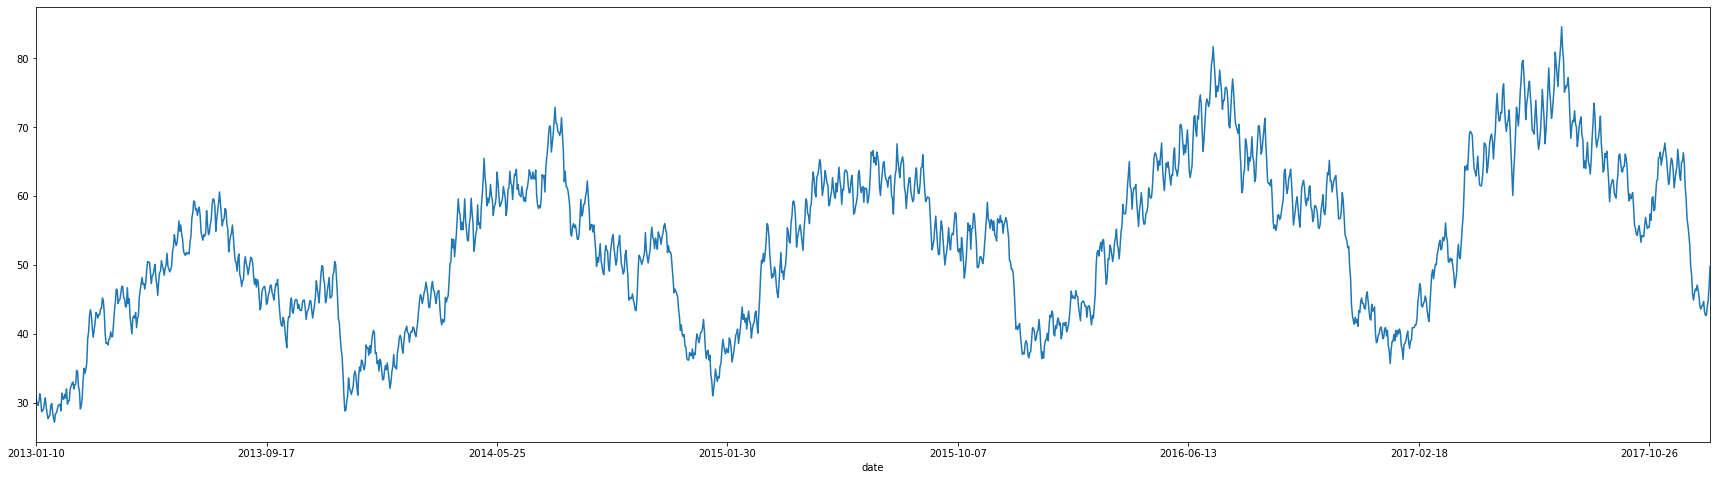

In [0]:
mydata.iloc[:,1].plot(figsize=(30,8))


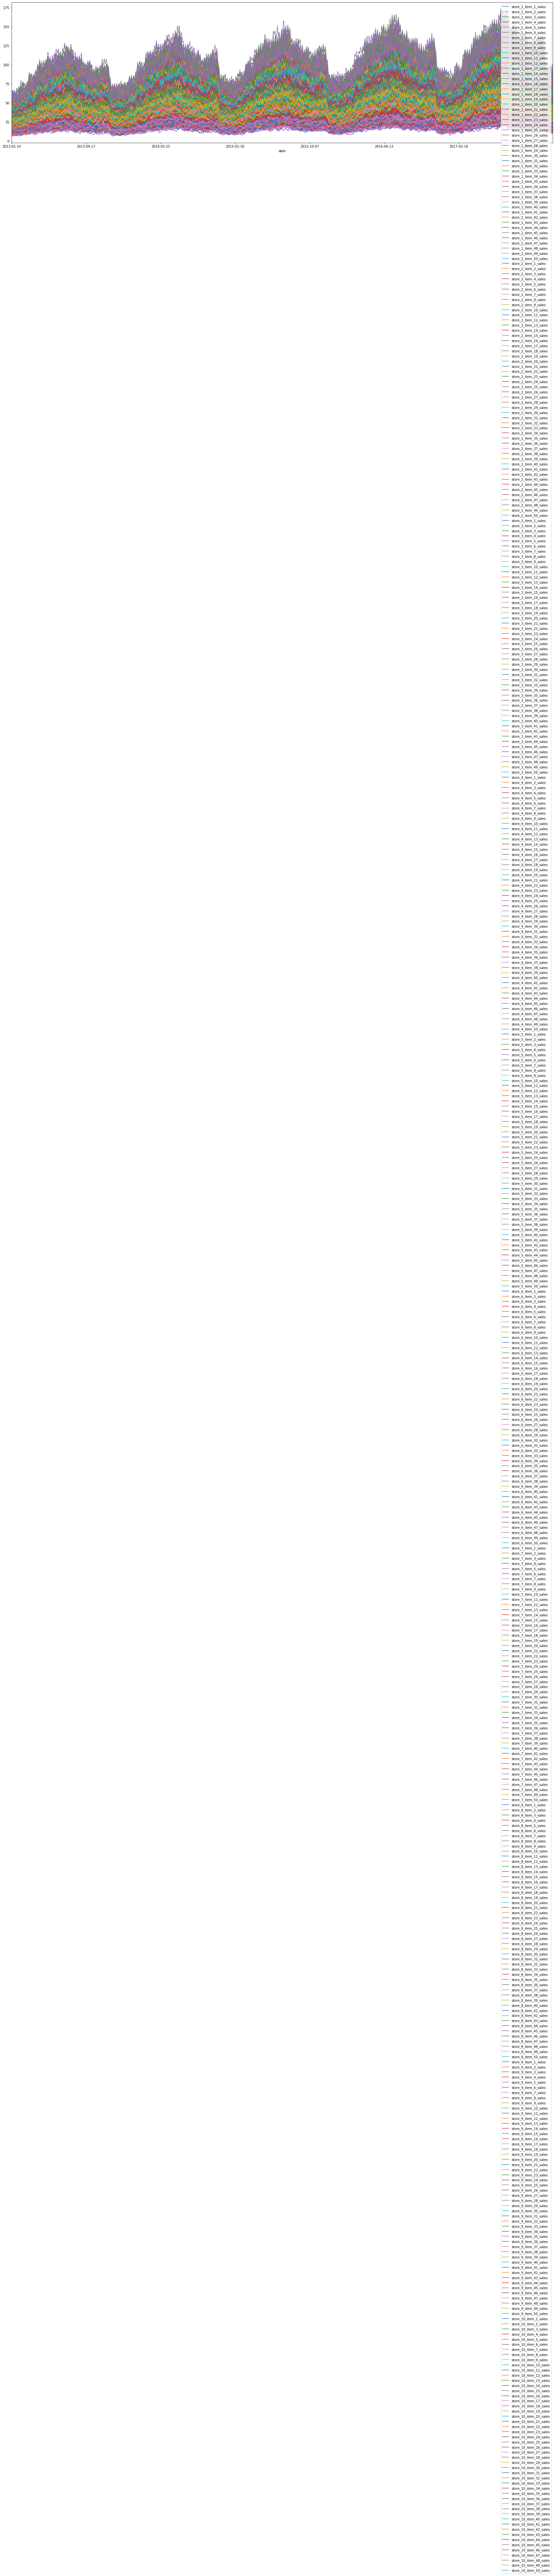

In [0]:
mydata.plot(figsize =(30,8))

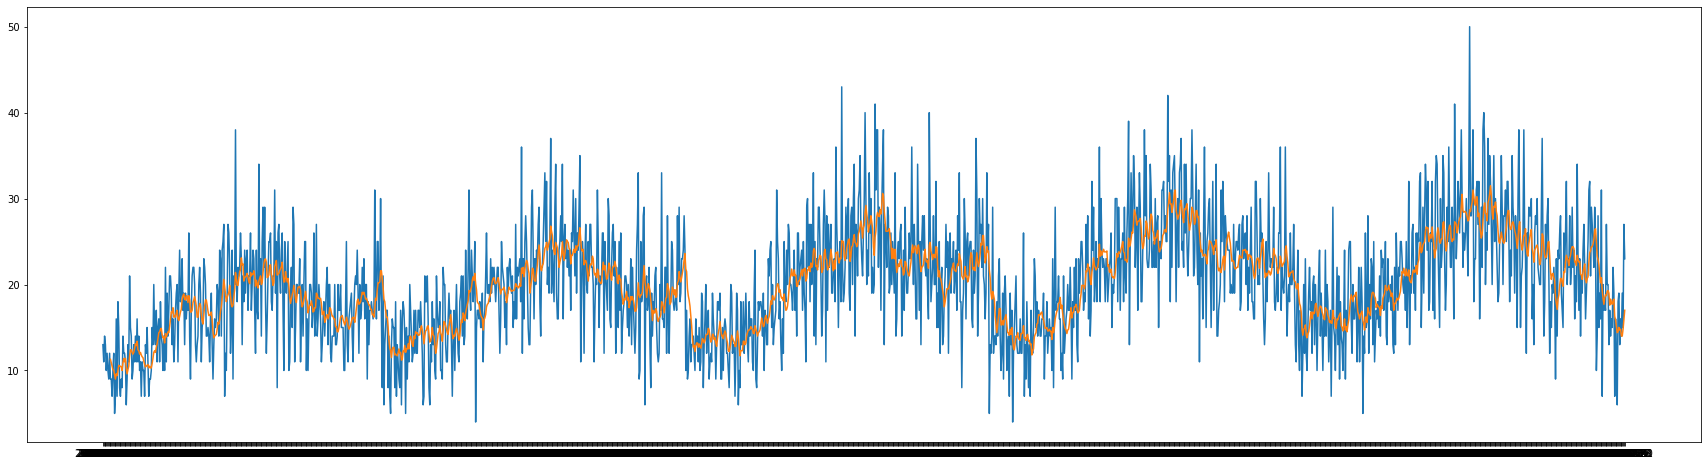

In [0]:
plt.figure(figsize=(30,8))
plt.plot(df_train.index, df_train['store_1_item_1_sales'])
plt.plot(mydata.index, mydata['store_1_item_1_sales'])
plt.show()

In [0]:
mydata.shape

(1817, 500)

In [0]:
mydata_mean = mydata.mean()
mydata_std = mydata.std()

In [0]:
print(mydata_std[0])

4.563749798018233


In [0]:
print(mydata_std)

store_1_item_1_sales       4.563750
store_1_item_2_sales      11.397738
store_1_item_3_sales       7.214110
store_1_item_4_sales       4.358596
store_1_item_5_sales       3.652109
                            ...    
store_10_item_46_sales    13.930366
store_10_item_47_sales     5.491769
store_10_item_48_sales    12.074119
store_10_item_49_sales     7.382114
store_10_item_50_sales    15.609759
Length: 500, dtype: float64


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
mydata_scaled = StandardScaler().fit(mydata).transform(mydata)

In [0]:
round(mydata_scaled.std())

1.0

In [0]:
mydata_scaled.shape

(1817, 500)

In [0]:
dataset = pd.DataFrame({'store_1_item_1_sales':mydata_scaled[:, 0]})
dataset.head()

,store_1_item_1_sales
0,-1.905284
1,-1.992955
2,-2.080626
3,-2.168298
4,-2.190216


In [0]:
datasets = pd.DataFrame(mydata_scaled, columns=store_item)
datasets.head()

,store_1_item_1_sales,store_1_item_2_sales,store_1_item_3_sales,store_1_item_4_sales,store_1_item_5_sales,store_1_item_6_sales,store_1_item_7_sales,store_1_item_8_sales,store_1_item_9_sales,store_1_item_10_sales,store_1_item_11_sales,store_1_item_12_sales,store_1_item_13_sales,store_1_item_14_sales,store_1_item_15_sales,store_1_item_16_sales,store_1_item_17_sales,store_1_item_18_sales,store_1_item_19_sales,store_1_item_20_sales,store_1_item_21_sales,store_1_item_22_sales,store_1_item_23_sales,store_1_item_24_sales,store_1_item_25_sales,store_1_item_26_sales,store_1_item_27_sales,store_1_item_28_sales,store_1_item_29_sales,store_1_item_30_sales,store_1_item_31_sales,store_1_item_32_sales,store_1_item_33_sales,store_1_item_34_sales,store_1_item_35_sales,store_1_item_36_sales,store_1_item_37_sales,store_1_item_38_sales,store_1_item_39_sales,store_1_item_40_sales,...,store_10_item_11_sales,store_10_item_12_sales,store_10_item_13_sales,store_10_item_14_sales,store_10_item_15_sales,store_10_item_16_sales,store_10_item_17_sales,store_10_item_18_sales,store_10_item_19_sales,store_10_item_20_sales,store_10_item_21_sales,store_10_item_22_sales,store_10_item_23_sales,store_10_item_24_sales,store_10_item_25_sales,store_10_item_26_sales,store_10_item_27_sales,store_10_item_28_sales,store_10_item_29_sales,store_10_item_30_sales,store_10_item_31_sales,store_10_item_32_sales,store_10_item_33_sales,store_10_item_34_sales,store_10_item_35_sales,store_10_item_36_sales,store_10_item_37_sales,store_10_item_38_sales,store_10_item_39_sales,store_10_item_40_sales,store_10_item_41_sales,store_10_item_42_sales,store_10_item_43_sales,store_10_item_44_sales,store_10_item_45_sales,store_10_item_46_sales,store_10_item_47_sales,store_10_item_48_sales,store_10_item_49_sales,store_10_item_50_sales
0,-1.905284,-1.992403,-2.268263,-1.854917,-2.063610,-2.218640,-2.046110,-1.926944,-2.204273,-2.038366,-1.954971,-1.830909,-2.288711,-2.247942,-2.160792,-1.988704,-1.988526,-2.119160,-2.133824,-1.894333,-1.922123,-2.220501,-2.251117,-2.013919,-2.153404,-2.039242,-1.879457,-1.941749,-2.070386,-1.628838,-2.182390,-2.013721,-2.172732,-2.058639,-2.029422,-1.841448,-1.853587,-2.289418,-1.834275,-2.174319,...,-1.842275,-1.902038,-2.298391,-2.026438,-2.048890,-2.456249,-2.172120,-2.109942,-2.171093,-1.853660,-1.834529,-2.200878,-2.038480,-2.412220,-2.138322,-2.196026,-1.946619,-1.970223,-2.359954,-1.911975,-2.196249,-2.329026,-1.965560,-2.122977,-2.059296,-2.169127,-1.938181,-2.184579,-2.000327,-1.828708,-2.133356,-2.084212,-2.277014,-2.308054,-2.241735,-2.019747,-2.003338,-2.261475,-2.06968,-2.213437
1,-1.992955,-2.036284,-2.143473,-1.648371,-2.090999,-2.173614,-2.019594,-1.899184,-2.184122,-2.066945,-1.977616,-1.794605,-2.176376,-2.265768,-2.160792,-2.085655,-1.957481,-2.088570,-1.972855,-1.849610,-1.947539,-2.313088,-2.198805,-2.069427,-2.250312,-2.018520,-1.833465,-1.965820,-2.032978,-1.616274,-2.235641,-2.037566,-2.104219,-2.078248,-2.053230,-1.907955,-1.765888,-2.082785,-1.776737,-2.156749,...,-1.901609,-1.848797,-2.228172,-1.947375,-1.985509,-2.472267,-2.096618,-2.104913,-2.034977,-1.836342,-1.915214,-2.089117,-2.108090,-2.405893,-2.111871,-2.072062,-1.872690,-2.028188,-2.303990,-1.777619,-2.210679,-2.338563,-2.049029,-2.138763,-2.097489,-2.202122,-2.037086,-2.173953,-2.048472,-1.814556,-2.095906,-1.983260,-2.162870,-2.195227,-2.220844,-1.955122,-1.875840,-2.170346,-1.98838,-2.194213
2,-2.080626,-2.071388,-2.295994,-1.694270,-2.036221,-2.155604,-1.913528,-1.857544,-2.032988,-2.052655,-1.954971,-1.801866,-2.089004,-2.239029,-2.060430,-2.124435,-1.817779,-2.082453,-1.861415,-1.726623,-1.985663,-2.174208,-2.303430,-1.958411,-2.088798,-2.070326,-1.833465,-1.851485,-1.950681,-1.628838,-2.182390,-2.061410,-2.066157,-1.901764,-2.037358,-1.921256,-1.765888,-1.985926,-1.765229,-2.191889,...,-1.955010,-1.819219,-2.238203,-1.976125,-1.863624,-2.520320,-2.058867,-2.029478,-2.034977,-1.775731,-1.854701,-2.051863,-1.982792,-2.348955,-2.027230,-1.886116,-1.872690,-2.004036,-2.12366

In [0]:
datasets.shape

(1817, 500)

In [0]:
def SeprateStoreItem(i):
  SI = np.array(datasets.iloc[:,i:i+1])
  return SI 

In [0]:
Accuracy_score = []

In [0]:
predicted_sales = pd.DataFrame()

In [0]:
predicted_sales

""


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
for i in range(500):
  FSFI =SeprateStoreItem(i)
  Xtrain = FSFI#[:1237]#Xtest = FSFI[1237:]
  x_train = [0]*(len(Xtrain)-6)
  y_train = [0]*(len(Xtrain)-6)#x_test = [0]*(90)
  y_pred = [0]*(90)
  for j in  range(len(Xtrain)-6):
    x_train[j] = Xtrain[j+0:j+6]
    y_train[j] = Xtrain[j+6]
  x_train = np.array(x_train)
  y_train = np.array(y_train)
  xA_train = x_train.reshape(1811,6)
  yA_train = y_train.reshape(1811,)
  #print("shape of x_train {} and shape of y_train {}".format(x_train.shape, y_train.shape))
  trainer = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=100, solver='lbfgs', random_state=9876,activation='relu')
  learner = trainer.fit(xA_train, yA_train)#for i in  range(len(Xtest)-6):
  xx = Xtrain[len(Xtrain)-6:].T#Xtest[i+0:i+6]#y_test = Xtrain[-1]#Xtest[i+6]
  a=[]
  for k in range(1,91):
    a = learner.predict(xx)
    xx = np.squeeze(xx)
    xx=xx.tolist()
    xx.pop(0)
    xx.append(a[0])
    xx=np.array(xx)
    xx=xx.reshape(1,6)
    y_pred[k-1] = a[0]*mydata_std[i]+mydata_mean[i]
  A = store_item[i] 
  d = pd.DataFrame({A: y_pred})
  predicted_sales = pd.concat([predicted_sales,d],axis=1)
  #print(predicted_sales.shape)

In [0]:
a.shape

(1,)

In [0]:
#predicted_sales.keys()

In [0]:
predicted_sales.head()

,store_1_item_1_sales,store_1_item_2_sales,store_1_item_3_sales,store_1_item_4_sales,store_1_item_5_sales,store_1_item_6_sales,store_1_item_7_sales,store_1_item_8_sales,store_1_item_9_sales,store_1_item_10_sales,store_1_item_11_sales,store_1_item_12_sales,store_1_item_13_sales,store_1_item_14_sales,store_1_item_15_sales,store_1_item_16_sales,store_1_item_17_sales,store_1_item_18_sales,store_1_item_19_sales,store_1_item_20_sales,store_1_item_21_sales,store_1_item_22_sales,store_1_item_23_sales,store_1_item_24_sales,store_1_item_25_sales,store_1_item_26_sales,store_1_item_27_sales,store_1_item_28_sales,store_1_item_29_sales,store_1_item_30_sales,store_1_item_31_sales,store_1_item_32_sales,store_1_item_33_sales,store_1_item_34_sales,store_1_item_35_sales,store_1_item_36_sales,store_1_item_37_sales,store_1_item_38_sales,store_1_item_39_sales,store_1_item_40_sales,...,store_10_item_11_sales,store_10_item_12_sales,store_10_item_13_sales,store_10_item_14_sales,store_10_item_15_sales,store_10_item_16_sales,store_10_item_17_sales,store_10_item_18_sales,store_10_item_19_sales,store_10_item_20_sales,store_10_item_21_sales,store_10_item_22_sales,store_10_item_23_sales,store_10_item_24_sales,store_10_item_25_sales,store_10_item_26_sales,store_10_item_27_sales,store_10_item_28_sales,store_10_item_29_sales,store_10_item_30_sales,store_10_item_31_sales,store_10_item_32_sales,store_10_item_33_sales,store_10_item_34_sales,store_10_item_35_sales,store_10_item_36_sales,store_10_item_37_sales,store_10_item_38_sales,store_10_item_39_sales,store_10_item_40_sales,store_10_item_41_sales,store_10_item_42_sales,store_10_item_43_sales,store_10_item_44_sales,store_10_item_45_sales,store_10_item_46_sales,store_10_item_47_sales,store_10_item_48_sales,store_10_item_49_sales,store_10_item_50_sales
0,17.054785,50.232516,27.323253,16.407055,13.854084,44.504499,46.505834,60.388626,38.393581,63.206007,53.207994,54.631003,63.850176,48.036849,69.353742,20.733096,27.181659,69.855717,31.794918,41.974062,30.904015,65.764420,23.136544,48.258345,63.441232,43.600172,18.922884,71.643638,53.475241,30.557118,43.521817,34.798561,57.505846,21.709753,52.795990,62.120065,20.658653,64.673803,35.536420,23.868296,...,75.738545,71.102177,82.705609,57.018087,85.258193,23.484008,34.437455,81.699902,36.409218,45.884699,40.036548,79.764948,30.246259,65.431238,76.139701,43.789736,22.281906,84.520163,69.018894,39.250794,56.345357,41.072610,68.319321,23.859866,61.486530,75.301739,28.927314,80.301633,41.321992,28.759793,21.168800,35.246231,51.250270,27.089424,77.873916,59.893978,19.754598,50.275907,28.959020,64.947786
1,16.837797,50.049359,26.789760,16.496466,13.684701,43.492670,45.658209,59.262401,38.639973,62.091677,52.634219,54.526504,63.198431,47.672564,69.628424,20.837741,26.779772,70.120815,31.648900,41.648143,30.415955,65.684177,23.397325,48.219486,63.568537,43.250239,18.820144,71.365969,53.030747,30.777144,43.563098,34.812419,57.947019,21.654882,52.397985,61.984919,20.625186,64.514347,35.292951,23.820687,...,74.589388,70.036475,82.643545,57.994960,84.124632,23.227340,34.339984,81.261433,36.588744,46.039931,40.520076,78.782834,30.296305,64.883263,75.930840,43.671541,22.466348,83.699334,67.589072,39.295041,56.517387,40.641014,67.382773,23.907333,61.305192,74.895608,28.862537,80.506269,41.357661,28.683875,21.087797,34.858513,51.269360,26.709479,77.952662,59.192982,19.947510,49.952888,28.632783,64.474446
2,16.526912,48.930353,26.630533,16.627543,13.561514,43.200799,45.284962,59.728974,38.260169,60.879538,52.451683,54.838920,63.102204,47.295715,69.505492,20.577044,26.254775,68.650520,31.680225,41.534513,30.346635,65.250041,23.431656,47.906967,62.352361,42.422871,18.505535,70.441777,53.244676,30.465123,43.735340,35.280040,58.071417,21.411713,51.607233,62.060453,20.667925,63.845123,35.269827,23.627296,...,72.934557,68.262842,82.224717,58.090968,83.960360,23.168527,34.325527,80.650491,36.245265,46.047252,40.346360,77.956318,30.255227,64.629829,75.326151,43.707315,22.581576,83.407093,66.433

In [0]:
FSFI = mydata_scaled[:,:1]

In [0]:
FSFI

array([[-1.90528377],
       [-1.99295512],
       [-2.08062648],
       ...,
       [-1.13815944],
       [-0.89706322],
       [-0.655967  ]])

In [0]:
print(FSFI.shape)

(1817, 1)


In [0]:
Xtrain = FSFI[:1237]
Xtest = FSFI[1237:]

In [0]:
print(Xtrain.shape)
print(Xtest.shape)

(1237, 1)
(580, 1)


In [0]:
x_train = [0]*(len(Xtrain)-6)
y_train = [0]*(len(Xtrain)-6)
x_test = [0]*(len(Xtest)-6)
y_test = [0]*(len(Xtest)-6)

In [0]:
for i in  range(len(Xtrain)-6):
  x_train[i] = Xtrain[i+0:i+6]
  y_train[i] = Xtrain[i+6]
print(i)

1230


In [0]:
for i in  range(len(Xtest)-6):
  x_test[i] = Xtest[i+0:i+6]
  y_test[i] = Xtest[i+6]
print(i)

573


In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [0]:
print("shape of x_train {} and shape of y_train {}".format(x_train.shape, y_train.shape))
print("shape of x_train {} shape of y_test {}".format(x_test.shape,y_test.shape))

shape of x_train (1231, 6, 1) and shape of y_train (1231, 1)
shape of x_train (574, 6, 1) shape of y_test (574, 1)


In [0]:
xA_train = x_train.reshape(1231,6)
yA_train = y_train.reshape(1231,)
xA_test = x_test.reshape(574,6)
yA_test = y_test.reshape(574,)

In [0]:
print("shape of xA_train {} and shape of yA_train {}".format(xA_train.shape, yA_train.shape))
print("shape of xA_train {} shape of yA_test {}".format(xA_test.shape,yA_test.shape))

shape of xA_train (1231, 6) and shape of yA_train (1231,)
shape of xA_train (574, 6) shape of yA_test (574,)


In [0]:
type(xA_train)

numpy.ndarray

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
trainer = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=100, solver='lbfgs', random_state=9876,activation='relu')

In [0]:
learner = trainer.fit(xA_train, yA_train)

In [0]:
Ypred = learner.predict(xA_test)

In [0]:
from sklearn.metrics import accuracy_score


In [0]:
type(Ypred)

numpy.ndarray

In [0]:
Yp1 = Ypred.reshape(-1,1) 

In [0]:
accuuu = learner.score(xA_test,yA_test)*100
accuuu 

96.6032343916431